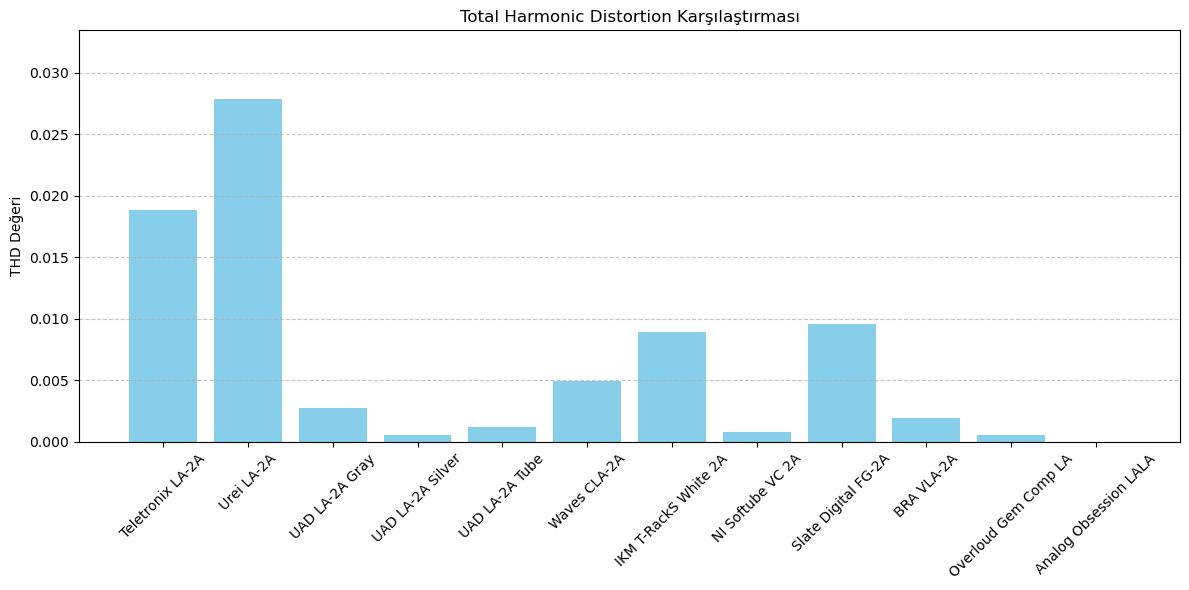

In [3]:
# En temiz ve izole harmonik referansı sağlar.
# LA-2A gibi optik kompresörlerin yarattığı harmonik distorsiyonu net bir şekilde ölçer.

# Librosa sisteminin aktarılması
import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.

# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/processed/teletronix_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/urei_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_gray_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_silver_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_tube_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/waves_cla-2a_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/ikm_white-2a_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/ni_softube_vc-2a_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/ss_fg-2a_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/bra_vla-2a_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/overloud_gem-comp-la_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/ao_lala_1_khz_sine.wav",
]

# Her dosya için açıklayıcı isimler ekleme
audio_labels = [
    "Teletronix LA-2A",
    "Urei LA-2A",
    "UAD LA-2A Gray",
    "UAD LA-2A Silver",
    "UAD LA-2A Tube",
    "Waves CLA-2A",
    "IKM T-RackS White 2A",
    "NI Softube VC 2A",
    "Slate Digital FG-2A",
    "BRA VLA-2A",
    "Overloud Gem Comp LA",
    "Analog Obsession LALA",
]

# THD hesaplama fonksiyonu
def thd_analysis(signal, sr):
    ft = np.fft.fft(signal)
    magnitude = np.abs(ft[:len(ft) // 2])  # Yalnızca pozitif frekanslar
    freq_bins = np.fft.fftfreq(len(signal), d=1/sr)[:len(ft)//2]
    
    # Temel frekansı belirle
    fundamental_idx = np.argmax(magnitude)
    fundamental_freq = freq_bins[fundamental_idx]
    
    # Harmoniklerin toplamını bul
    harmonics_magnitude = 0
    for n in range(2, 6):  # 2., 3., 4., 5. harmonikler
        harmonic_freq = n * fundamental_freq
        harmonic_idx = np.argmin(np.abs(freq_bins - harmonic_freq))
        harmonics_magnitude += magnitude[harmonic_idx]
    
    # THD Hesabı
    thd = harmonics_magnitude / magnitude[fundamental_idx]
    return thd

# Ses dosyalarını analiz etme
thd_values = []
for file in audio_files:
    sound, sr = librosa.load(file, sr=None)
    thd_values.append(thd_analysis(sound, sr))

# THD sonuçlarını görselleştirme
plt.figure(figsize=(12, 6))
plt.bar(audio_labels, thd_values, color='skyblue')
plt.ylabel("THD Değeri")
plt.title("Total Harmonic Distortion Karşılaştırması")
plt.xticks(rotation=45)
plt.ylim(0, max(thd_values) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()